In [3]:
from numpy import *
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

Lets consider a tri-diagonal matrix (similar to the one in poisson_1d, but having slightly different sub and super diagonals to distinguish the entries easily). There is no need to store the zeros. We store the matrix in a (N,3) array. Then the last (N-1) entries of the first column will contain the sub-diagonal, the N entries of the second column will contain the diagonal, and the  first (N-1) entries of the third column will contain the super-diagonal. (This ensures that all entries in the same row are in the same component. This is not necessary, and we could have stored the matrix in many other similar formats).




In [6]:
N = 5

def create_tri_mat(N):
    A_tri= np.zeros((N,3))
    A_tri[1:N,0] = -2*np.ones((N-1,)) #sub-diagonal
    A_tri[0:N,1] =  10*np.ones((N,))   #diagonal
    A_tri[0:N-1,2] = -4*np.ones((N-1,))   #super-diagonal
    return A_tri
    
A_tri = create_tri_mat(N)
print(A_tri)

[[ 0. 10. -4.]
 [-2. 10. -4.]
 [-2. 10. -4.]
 [-2. 10. -4.]
 [-2. 10.  0.]]


Lets transform this matrix as a regular matrix. Of course we will never do this in practice, but this is a good exercise to understand how to access the entries in the matrix, and how to only loop over the non-zero entries. 

In [5]:
def create_dense_mat(A_tri,N):
    
    A_dense = np.zeros((N,N))
    for i in range(N): # go over all rows
        #only 3 non-zero entries in each row.
        for j in range(i-1,i+2):  #This will go through entries (i,i-1), (i,i) and (i,i+1)
            if j >= 0 and j <= N-1:
                A_dense[i,j] = A_tri[i,j-i+1] #Make sure you understand the indexing
    return A_dense
            
A_dense = create_dense_mat(A_tri,N)
print(A_dense)
            

[[10. -4.  0.  0.  0.]
 [-2. 10. -4.  0.  0.]
 [ 0. -2. 10. -4.  0.]
 [ 0.  0. -2. 10. -4.]
 [ 0.  0.  0. -2. 10.]]


Similarly, we can write code for banded GE taking advantage of the above structure. This GE algorithm will run in time O($N$). Below we simply experiment with Mat-Vec. Recall this took O($N^2$) when the matrix was not banded.

In [4]:
def tri_mat_vec(A_tri, x):
    N = len(x)
    y = np.zeros((N,))
    for i in range(N): # go over all rows
        for j in range(i-1,i+2):  #This will go through entries (i,i-1), (i,i) and (i,i+1)
            if j >= 0 and j <= N-1:
                y[i] += A_tri[i,j-i+1]*x[j]
    return y
    

In [13]:
N_arr = [3000,5000,10000,15000,20000,40000,80000,100000,200000]
time_list = []

for N in N_arr:
    A_tri = create_tri_mat(N)
    x = np.ones((N,))
    
    t_start = time.time()
    y = tri_mat_vec(A_tri, x)
    t_end = time.time()
    time_list.append(t_end-t_start)
    
    #Lets verify we did not make a mistake for small N
    if N < 50000:
        y_true = create_dense_mat(A_tri,N) @ x
        assert( np.linalg.norm(y-y_true,inf) < 1e-12)
    

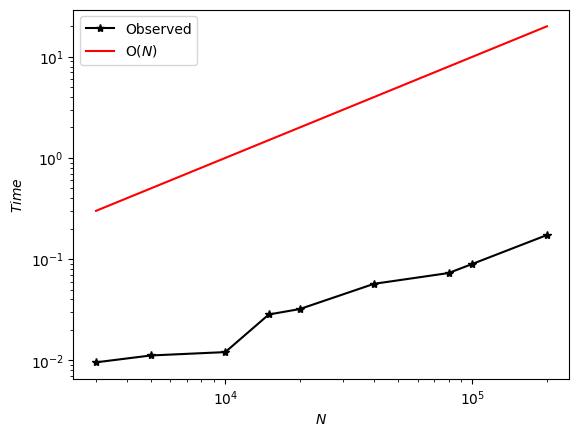

In [14]:

plt.loglog(N_arr,time_list,'k-*',label='Observed')
plt.loglog(N_arr,np.array(N_arr)*1e-4,'r-', label='O$(N)$')

plt.xlabel('$N$')
plt.ylabel('$Time$')

plt.legend(loc='upper left')

plt.show()
